<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_Vetores_Aleat%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vetores Aleatórios, Probabilidades e Momentos  Conjuntos e Condicionais
**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np    
from scipy import stats
import matplotlib.pyplot as plt

## Vetores Aleatórios

O vetor aleatóorio $V = [X_1, X_2, X_3]$ é definido sobre $\Omega = \{1,2,3,4,5,6\}$, onde cada $X_i = f(Y_j)$ e $Y_i$ são $n$ variáveis aleatórias representando $n$ lançamentos de dados, definidas a seguir:

* $X_1$ é a somatório de $Y_i$ tal que:
$$X_1 = \sum_{i=1}^n Y_i$$
* $X_2$ é a contagem da quantidade de números pares em $Y_i$, tal que:
$$X_2 = \sum_{i=1}^n \mathbb{1}(Y_i \% 2 = 0)$$
* $X_3$ é o contador de valores menores ou iguais à 3, tal que:
$$X_3 = \sum_{i=1}^n \mathbb{1}(Y_i \leq 3)$$

In [ ]:
def vetor_aleatorio(n, m):
  X1 = []
  X2 = []
  X3 = []
  for i in range(m):
    soma = 0
    paridade = 0
    menor_igual = 0
    for i in range(n):
      va = np.random.randint(1, 7, 1)[0]
      soma += va
      paridade += 1 if va % 2 == 0 else 0
      menor_igual += 1 if va <= 3 else 0
    X1.append(soma)
    X2.append(paridade)
    X3.append(menor_igual)
  return X1, X2, X3

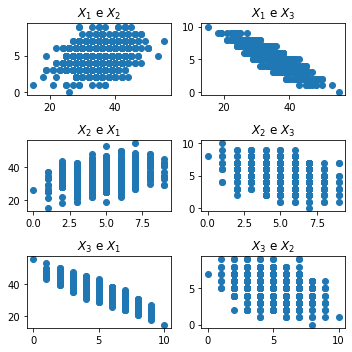

In [ ]:
n = 10
m = 1000
X1, X2, X3 = vetor_aleatorio(n,m)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[5,5])

ax[0][0].scatter(X1, X2)
ax[0][0].set_title("$X_1$ e $X_2$")
ax[0][1].scatter(X1, X3)
ax[0][1].set_title("$X_1$ e $X_3$")
ax[1][0].scatter(X2, X1)
ax[1][0].set_title("$X_2$ e $X_1$")
ax[1][1].scatter(X2, X3)
ax[1][1].set_title("$X_2$ e $X_3$")
ax[2][0].scatter(X3, X1)
ax[2][0].set_title("$X_3$ e $X_1$")
ax[2][1].scatter(X3, X2)
ax[2][1].set_title("$X_3$ e $X_2$")

plt.tight_layout()

## Probabilidades Marginais ou Probabilidade Incondicional

In [ ]:
def prob_marg(X):
  X_range = [k for k in range(np.min(X), np.max(X)+1)]
  pX = {k:0 for k in X_range}
  m = len(X)
  for i in range(m):
    pX[X[i]] += 1
  for k in X_range:
    pX[k] /= m
  return pX



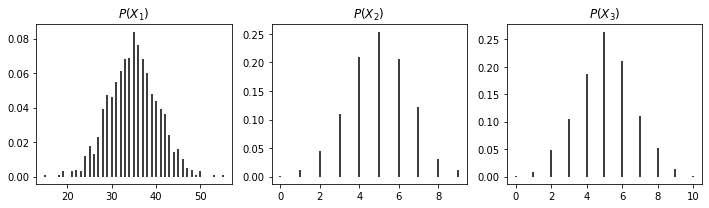

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[10,3])
                       
px1 = prob_marg(X1)
ax[0].vlines([k for k in px1.keys()], [0 for k in px1.keys()], [v for v in px1.values()])
ax[0].set_title("$P(X_1)$")

px2 = prob_marg(X2)
ax[1].vlines([k for k in px2.keys()], [0 for k in px2.keys()], [v for v in px2.values()])
ax[1].set_title("$P(X_2)$")

px3 = prob_marg(X3)
ax[2].vlines([k for k in px3.keys()], [0 for k in px3.keys()], [v for v in px3.values()])
ax[2].set_title("$P(X_3)$")

plt.tight_layout()

## Probabilidades Conjuntas

$$P(X,Y) = \frac{ |X \cap Y|}{|F|}$$

In [ ]:
def prob_conj(X,Y):
  X_range = [k for k in range(np.min(X), np.max(X)+1)]
  Y_range = [k for k in range(np.min(Y), np.max(Y)+1)]
  pconj_X_Y = np.zeros((len(X_range), len(Y_range)))
  m = len(X)
  for i in range(m):
    x = X[i]
    y = Y[i]
    pconj_X_Y[ X_range.index(x) ][ Y_range.index(y) ] += 1

  pconj_X_Y /= m
  return pconj_X_Y, X_range, Y_range

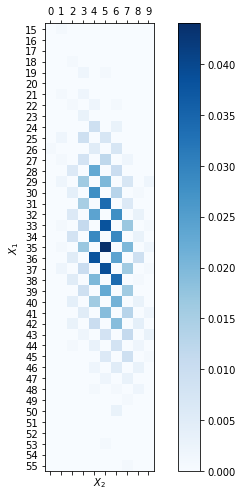

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[7,7])

pxy, xl, yl = prob_conj(X1,X2)

im = ax.matshow(pxy, cmap='Blues')
ax.set_xlabel("$X_2$")
ax.set_ylabel("$X_1$")
_ = ax.set_xticks([k for k in range(len(yl))])
_ = ax.set_xticklabels(yl)
_ = ax.set_yticks([k for k in range(len(xl))])
_ = ax.set_yticklabels(xl)
#for i in range(len(xl)):
#    for j in range(len(yl)):
#        text = ax.text(j, i, round(pxy[i, j], 2),
#                       ha="center", va="center", color="w")
fig.colorbar(im)

plt.tight_layout()

In [ ]:
px1[34]

0.069

In [ ]:
ix34 = xl.index(34)
px34 = np.sum([ pxy[ix34][j] for j in range(len(yl)) ])
px34

0.069

## Momentos Conjuntos

$$\mathbb{E}[g(X,Y)] = \sum_{x_i \in \Omega}\sum_{y_j \in \Omega} g(x_i, y_j) \cdot P(x_i, y_j)$$

$$\mathbb{Var}[X,Y] = \mathbb{E}_{XY}[ (X - \mathbb{E}[X])(Y - \mathbb{E}[Y]) ]$$

In [ ]:
def E(X):
  px = prob_marg(X)
  return np.sum([k*v for k,v in px.items()])

def Var(X):
  mx = E(X)
  px = prob_marg(X)
  return np.sum([((k-mx)**2)*v for k,v in px.items()])

In [ ]:
V = [ E(X1), E(X2), E(X3)]
V

[34.86600000000001, 4.981999999999999, 5.064]

In [ ]:
mx = E(X3)
px = prob_marg(X3)
[((k-mx)**2) *v for k,v in px.items()]

[0.6360555555555556,
 0.32938888888888884,
 0.32725925925925914,
 0.0909814814814814,
 0.04381481481481486,
 0.273925925925926,
 0.1973703703703704,
 0.785851851851852,
 0.32757407407407413]

In [ ]:
def Cov(X, Y):
  mx = E(X)
  my = E(Y)
  pxy, xr, yr = prob_conj(X, Y)
  cov = 0
  for i, xi in enumerate(xr):
    for j, yj in enumerate(yr):
      cov += ((xi - mx) * (yj - my)) * pxy[i][j]
  return cov 

In [ ]:
Cov(X1, X3)

-7.727424000000003

In [ ]:
def corr(X,Y):
  return  Cov(X,Y) / (Var(X) * Var(Y)) 

In [ ]:
corr(X1, X1)

0.033523249244955866

## Probabilidades Condicionais

$$P(X | Y) = \frac{P(X,Y)}{P(Y)}$$

In [ ]:
def prob_cond(X, Y):
  pY = prob_marg(Y)
  pconj_X_Y, xr, yr = prob_conj(X, Y) 
  pcond_X_Y = np.zeros((len(xr), len(yr)))
  for i, xi in enumerate(xr):
    for j, yj in enumerate(yr):
      pcond_X_Y[i][j] = pconj_X_Y[i][j] / pY[yj]
  return pcond_X_Y, xr, yr


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


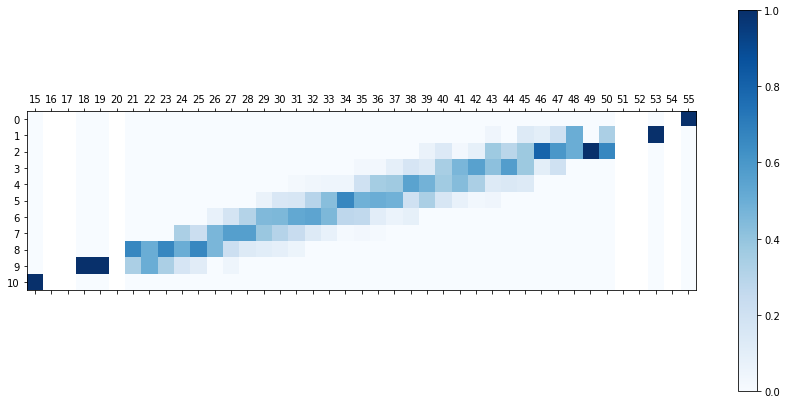

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,7])

pcxy, xl, yl = prob_cond(X3, X1)

im = ax.matshow(pcxy, cmap='Blues')
_ = ax.set_xticks([k for k in range(len(yl))])
_ = ax.set_xticklabels(yl)
_ = ax.set_yticks([k for k in range(len(xl))])
_ = ax.set_yticklabels(xl)
fig.colorbar(im)

## Momentos Condicionais

$$\mathbb{E}[X|y_j] = \sum_{x_i \in \Omega} x_i \cdot P(x_i | y_j)$$

In [ ]:
def E_cond(X, Y):
  pcond_X_Y, xr, yr = prob_cond(X,Y)
  e_cond = np.zeros(len(yr))
  for j, yj in enumerate(yr):
    e_cond[j] = np.sum([xi * pcond_X_Y[i][j] 
                        for i, xi in enumerate(xr)])
  return e_cond, xr, yr



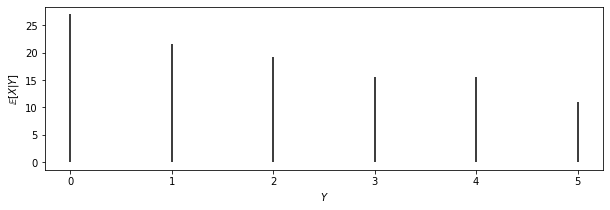

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

ecxy, xl, yl = E_cond(X1, X3)

ax.vlines([i for i in yl],[0 for i in yl], ecxy)
_ = ax.set_xlabel("$Y$")
_ = ax.set_ylabel("$\mathbb{E}[X|Y]$")

In [ ]:
ecxy

array([19.33333333, 17.        , 18.8       , 19.66666667, 21.        ])